In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

# Parameter
diff_S, diff_A, diff_W, diff_D = 0.1, 0.05, 0.02, 0.03  # Diffusionskoeffizienten
dt = 0.1  # Zeitschritt
noise_intensity = 0.01  # Intensität des stochastischen Rauschens
steps = 1000  # Simulationsschritte
size = (100, 100)  # Gittergröße

# Listen zur Speicherung der Durchschnittswerte
time_series_S, time_series_A, time_series_W, time_series_D = [], [], [], []

def R(t):
    return 0.1 * max(0, t - 10)

def K(k_0, alpha, D):
    return k_0 * (1 + alpha * D)

# Initialisierung der Felder
S = np.ones(size) * 0.7 # 70% of population are susceptible
A = np.ones(size) * 0.2 # 20% of population are abusers
W = np.ones(size) * 0.1 # 10% of population are whistleblowers
D = np.zeros(size) # At the beginning there are no dropouts

# Haupt-Loop der Simulation
for t in range(steps):
    # Diffusion (Laplace-Operator)
    dS = diff_S * laplace(S)
    dA = diff_A * laplace(A)
    dW = diff_W * laplace(W)
    dD = diff_D * laplace(D)

    # Reaktionsgleichungen mit Interaktionen
    reaction_S = -0.02 * S * A - 0.01 * S - 0.01 * W
    reaction_A = 0.02 * S * A - 0.03 * A * W - 0.02 * A
    reaction_W = 0.01 * S * W - 0.02 * W
    reaction_D = 0.01 * S + 0.02 * A + 0.02 * W

    # Stochastisches Rauschen
    #noise_S = noise_intensity * np.random.randn(*size)
    #noise_A = noise_intensity * np.random.randn(*size)
    noise_W = noise_intensity * np.random.randn(*size)
    noise_D = noise_intensity * np.random.randn(*size)

    # Update der Felder
    S += dt * (dS + reaction_S)
    A += dt * (dA + reaction_A - 0.01 * R(t) * A)
    W += dt * (dW + reaction_W + noise_W)
    D += dt * (dD + reaction_D + noise_D)

    # Werte in gültigem Bereich halten
    S = np.clip(S, 0, 1)
    A = np.clip(A, 0, 1)
    W = np.clip(W, 0, 1)
    D = np.clip(D, 0, 1)

    # Mittelwerte speichern
    time_series_S.append(S.mean())
    time_series_A.append(A.mean())
    time_series_W.append(W.mean())
    time_series_D.append(D.mean())


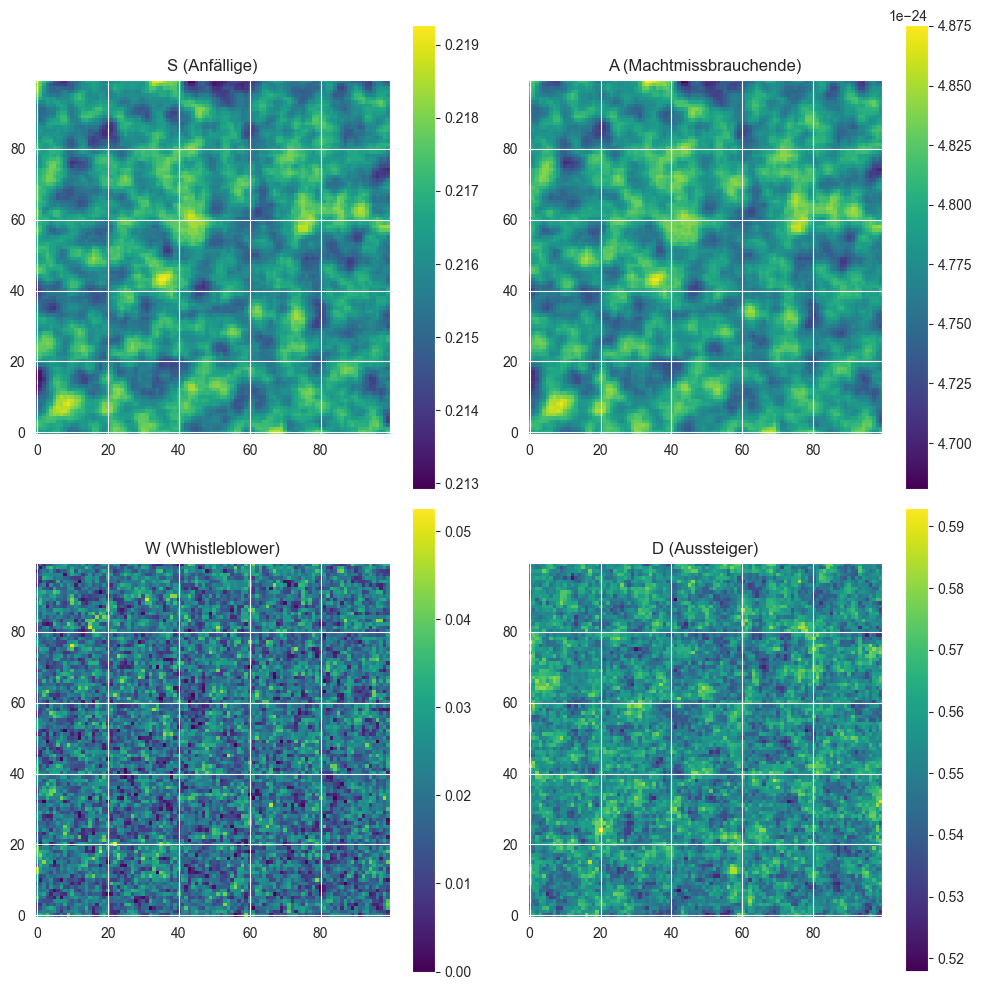

In [2]:
# Visualisierung - Heatmaps
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['S (Anfällige)', 'A (Machtmissbrauchende)', 'W (Whistleblower)', 'D (Aussteiger)']
data = [S, A, W, D]

for ax, title, field in zip(axes.flat, titles, data):
    im = ax.imshow(field, cmap='viridis', origin='lower')
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

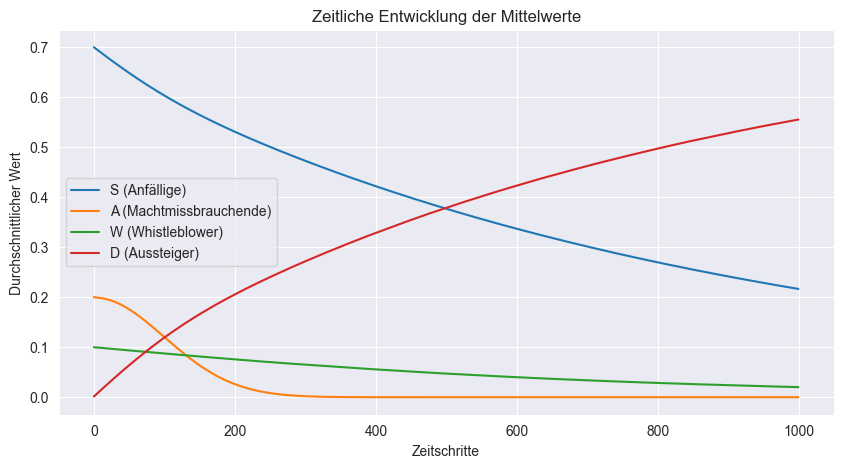

In [3]:
# Zeitliche Entwicklung
plt.figure(figsize=(10, 5))
plt.plot(time_series_S, label='S (Anfällige)')
plt.plot(time_series_A, label='A (Machtmissbrauchende)')
plt.plot(time_series_W, label='W (Whistleblower)')
plt.plot(time_series_D, label='D (Aussteiger)')
plt.xlabel('Zeitschritte')
plt.ylabel('Durchschnittlicher Wert')
plt.legend()
plt.title('Zeitliche Entwicklung der Mittelwerte')
plt.show()

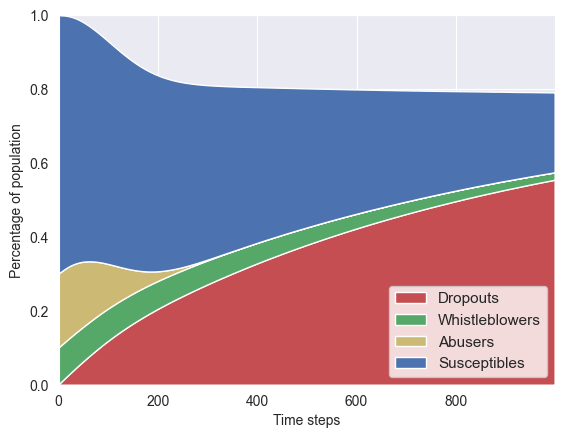

In [4]:
""" Stackplot of people's condition over time. """
import seaborn as sns
t = np.arange(steps)
y = [time_series_D, time_series_W, time_series_A, time_series_S]
fig, axis = plt.subplots()
sns.set_theme(style="whitegrid")
axis.stackplot(t, y, labels=['Dropouts', 'Whistleblowers', 'Abusers', 'Susceptibles'],colors = ['r', 'g', 'y', 'b'])

axis.legend()
axis.set_xlim(0, max(1, len(t)-1))
axis.set_ylim(0, 1)
axis.set_xlabel("Time steps")
axis.set_ylabel("Percentage of population")
plt.show()